In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('Iteration4').getOrCreate()
from pyspark.ml.classification import LogisticRegression

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/11 10:01:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('./diabetes_binary_d.csv', inferSchema=True,header=True)

##### 2.2 Describe the data 

In [3]:
df.printSchema()

print("Total Number of Rows:", df.count())

root
 |-- id: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)

Total Number of Rows: 36244


%%html
<style>
div.output_area pre {
    white-space: pre;
}

##### 2.3 Data Exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_data = df.toPandas()

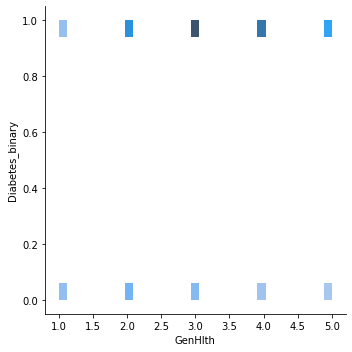

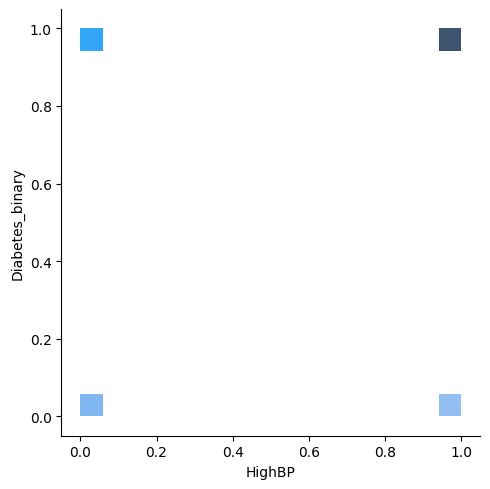

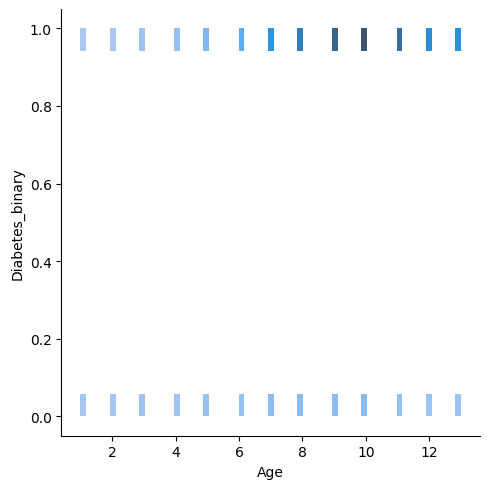

In [5]:
sns.displot(data=pandas_data, x="GenHlth", y="Diabetes_binary")
sns.displot(data=pandas_data, x="HighBP", y="Diabetes_binary")
sns.displot(data=pandas_data, x="Age", y="Diabetes_binary")

##### 2.4 Verify the data quality

<AxesSubplot:xlabel='Age', ylabel='BMI'>

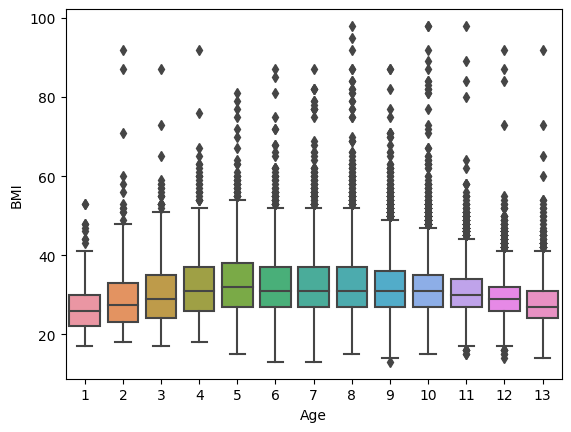

In [6]:
sns.boxplot(data=pandas_data, x="Age",y="BMI")

<AxesSubplot:xlabel='PhysHlth'>

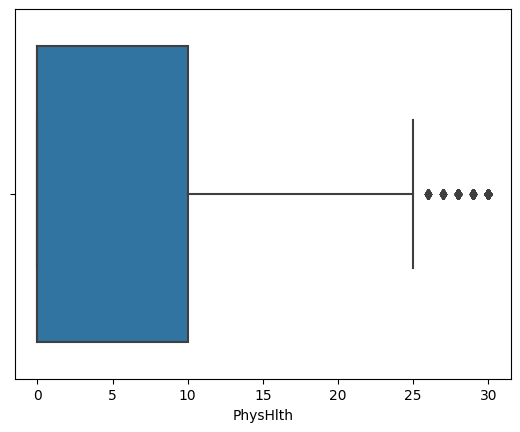

In [7]:
sns.boxplot(data=pandas_data, x="PhysHlth")

<AxesSubplot:xlabel='MentHlth'>

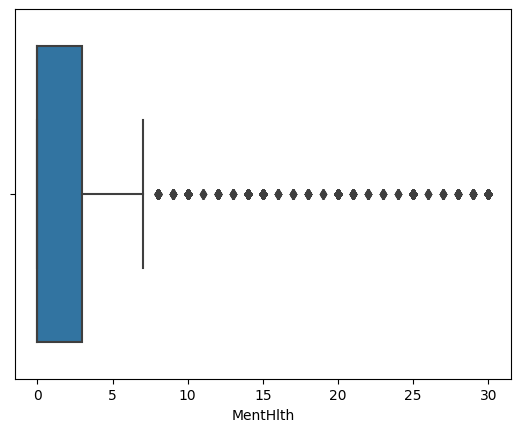

In [8]:
sns.boxplot(data=pandas_data, x="MentHlth")

In [9]:
from pyspark.sql.functions import *

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical = True)

-RECORD 0-------------------
 id                   | 0   
 Diabetes_binary      | 0   
 HighBP               | 0   
 HighChol             | 0   
 CholCheck            | 0   
 BMI                  | 0   
 Smoker               | 0   
 Stroke               | 0   
 HeartDiseaseorAttack | 0   
 PhysActivity         | 0   
 Fruits               | 0   
 Veggies              | 0   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 0   
 NoDocbcCost          | 0   
 GenHlth              | 0   
 MentHlth             | 0   
 PhysHlth             | 0   
 DiffWalk             | 0   
 Sex                  | 0   
 Age                  | 0   
 Education            | 0   
 Income               | 4   



##### 3.1 Data Selection

In [10]:
df.createOrReplaceTempView('new_data')
new_data = spark.sql("SELECT * FROM new_data")
new_data.show(1,vertical =True)
print("Total Number of Rows:", new_data.count())

-RECORD 0-------------------
 id                   | 1   
 Diabetes_binary      | 0   
 HighBP               | 1   
 HighChol             | 0   
 CholCheck            | 1   
 BMI                  | 26  
 Smoker               | 0   
 Stroke               | 0   
 HeartDiseaseorAttack | 0   
 PhysActivity         | 1   
 Fruits               | 0   
 Veggies              | 1   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 1   
 NoDocbcCost          | 0   
 GenHlth              | 3   
 MentHlth             | 5   
 PhysHlth             | 30  
 DiffWalk             | 0   
 Sex                  | 1   
 Age                  | 4   
 Education            | 6   
 Income               | 8   
only showing top 1 row

Total Number of Rows: 34109


In [11]:
selected_data=new_data.drop("Education","Income","Veggies","Fruits","Smoker","Stroke","NoDocbcCost")

selected_data.show(1, vertical = True)
print("Total Number of Columns:", len(selected_data.columns))

-RECORD 0-------------------
 id                   | 1   
 Diabetes_binary      | 0   
 HighBP               | 1   
 HighChol             | 0   
 CholCheck            | 1   
 BMI                  | 26  
 HeartDiseaseorAttack | 0   
 PhysActivity         | 1   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 1   
 GenHlth              | 3   
 MentHlth             | 5   
 PhysHlth             | 30  
 DiffWalk             | 0   
 Sex                  | 1   
 Age                  | 4   
only showing top 1 row

Total Number of Columns: 16


##### 3.5 Formatting Data

In [12]:
selected_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)



In [13]:
import pandas as pd
from pyspark.sql.functions import col

pandas_df = selected_data.toPandas()
pandas_df = pandas_df.replace(",", "", regex = True)

new_data = spark.createDataFrame(pandas_df) 

selected_columns = ["Sex"]

for c in selected_columns:
    format_data = new_data.withColumn(c ,new_data[c] .cast("binary"))
    
format_data.printSchema()

root
 |-- id: long (nullable = true)
 |-- Diabetes_binary: long (nullable = true)
 |-- HighBP: long (nullable = true)
 |-- HighChol: long (nullable = true)
 |-- CholCheck: long (nullable = true)
 |-- BMI: long (nullable = true)
 |-- HeartDiseaseorAttack: long (nullable = true)
 |-- PhysActivity: long (nullable = true)
 |-- HvyAlcoholConsump: long (nullable = true)
 |-- AnyHealthcare: long (nullable = true)
 |-- GenHlth: long (nullable = true)
 |-- MentHlth: long (nullable = true)
 |-- PhysHlth: long (nullable = true)
 |-- DiffWalk: long (nullable = true)
 |-- Sex: binary (nullable = true)
 |-- Age: long (nullable = true)



In [6]:
format_data.show(1, vertical = True)
format_data.describe().show(vertical = True)

22/10/11 09:07:34 WARN TaskSetManager: Stage 8 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0------------------------------------
 id                   | 1                    
 Diabetes_binary      | 0                    
 HighBP               | 1                    
 HighChol             | 0                    
 CholCheck            | 1                    
 BMI                  | 26                   
 HeartDiseaseorAttack | 0                    
 PhysActivity         | 1                    
 HvyAlcoholConsump    | 0                    
 AnyHealthcare        | 1                    
 GenHlth              | 3                    
 MentHlth             | 5                    
 PhysHlth             | 30                   
 DiffWalk             | 0                    
 Sex                  | [00 00 00 00 00 0... 
 Age                  | 4                    
only showing top 1 row



22/10/11 09:07:35 WARN TaskSetManager: Stage 9 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.


-RECORD 0-----------------------------------
 summary              | count               
 id                   | 70692               
 Diabetes_binary      | 70692               
 HighBP               | 70692               
 HighChol             | 70692               
 CholCheck            | 70692               
 BMI                  | 70692               
 HeartDiseaseorAttack | 70692               
 PhysActivity         | 70692               
 HvyAlcoholConsump    | 70692               
 AnyHealthcare        | 70692               
 GenHlth              | 70692               
 MentHlth             | 70692               
 PhysHlth             | 70692               
 DiffWalk             | 70692               
 Age                  | 70692               
-RECORD 1-----------------------------------
 summary              | mean                
 id                   | 35346.5             
 Diabetes_binary      | 0.5                 
 HighBP               | 0.5634583828438862  
 HighChol 

##### 3.2 Cleaning data

In [6]:
check_outlier_columns = ["BMI"]
bounds = {}

for c in check_outlier_columns: 
    quantile = new_data.approxQuantile(c, [0.25, 0.75],0.1)
    IQR = quantile[1] - quantile[0]
    bounds[c] = [quantile[0] - 1.5 * IQR,quantile[1] + 1.5 * IQR]
    
print(bounds)

22/10/11 09:20:26 WARN TaskSetManager: Stage 8 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.


{'BMI': [16.0, 40.0]}


In [7]:
outliers = new_data.select(*["id"]+[((new_data[c] < bounds[c][0]) |(new_data[c]>bounds[c][1])).alias(c+"_status") 
                                          for c in check_outlier_columns])
outliers.show(100)

join_status = new_data.join(outliers, on='id')
number_of_outliers = join_status.filter("BMI_status").count()

print("Total Number of Outliers:",number_of_outliers)
print("Total Number of Outliers:",number_of_outliers)

22/10/11 09:20:49 WARN TaskSetManager: Stage 9 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.


+---+----------+
| id|BMI_status|
+---+----------+
|  1|     false|
|  2|     false|
|  3|     false|
|  4|     false|
|  5|     false|
|  6|     false|
|  7|     false|
|  8|     false|
|  9|     false|
| 10|     false|
| 11|     false|
| 12|     false|
| 13|     false|
| 14|      true|
| 15|     false|
| 16|     false|
| 17|     false|
| 18|     false|
| 19|     false|
| 20|     false|
| 21|     false|
| 22|     false|
| 23|     false|
| 24|     false|
| 25|     false|
| 26|     false|
| 27|     false|
| 28|     false|
| 29|     false|
| 30|     false|
| 31|     false|
| 32|     false|
| 33|     false|
| 34|     false|
| 35|     false|
| 36|     false|
| 37|     false|
| 38|     false|
| 39|     false|
| 40|     false|
| 41|     false|
| 42|     false|
| 43|      true|
| 44|     false|
| 45|     false|
| 46|     false|
| 47|     false|
| 48|     false|
| 49|     false|
| 50|     false|
| 51|     false|
| 52|     false|
| 53|     false|
| 54|     false|
| 55|     false|
| 56|     fals

22/10/11 09:20:50 WARN TaskSetManager: Stage 10 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.
22/10/11 09:20:51 WARN TaskSetManager: Stage 11 contains a task of very large size (2501 KiB). The maximum recommended task size is 1000 KiB.


Total Number of Outliers: 5108
Total Number of Outliers: 5108


In [ ]:
cleaned_data = join_status.filter(~join_status["BMI_status"])

number_of_outliers = cleaned_data.filter("BMI_status").count()

print("Total Number of Outliers:",number_of_outliers)

In [6]:
cleaned_data.show(1, vertical = True)
cleaned_data.describe().show(vertical = True)

NameError: name 'cleaned_data' is not defined

#### 3.3 Construct the data

#### 3.4 Integrate various data sources

#### 4.1 Data Reduction